In [1]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd

from bullpen import data_utils

In [44]:
train = pd.read_csv(data_utils.DATA_DIR.joinpath('train.csv'))
train = train[[c for c in train.columns if c != 'K%'] + ['K%']]
train.head()

,MLBAMID,PlayerId,Name,Team,Age,Season,TBF,Rk,IP,PA,...,02h,L/SO,S/SO,L/SO%,3pK,4pW,PAu,Pitu,Stru,K%
0,621345,18655,A.J. Minter,ATL,27,2021,221,696,52.1,221,...,7,11,46,0.192982,11,4,0,0,0,0.257919
1,621345,18655,A.J. Minter,ATL,28,2022,271,649,70.0,272,...,2,23,71,0.244681,12,0,0,0,0,0.346863
2,621345,18655,A.J. Minter,ATL,29,2023,260,647,64.2,260,...,4,13,69,0.158537,8,1,0,0,0,0.315385
3,621345,18655,A.J. Minter,ATL,30,2024,134,676,34.1,135,...,1,7,28,0.200000,6,3,0,0,0,0.261194
4,640462,19343,A.J. Puk,OAK,27,2022,281,773,66.1,281,...,6,22,54,0.289474,15,4,0,0,0,0.270463


In [45]:
val_mask = train.Season == 2024
val_ = train[val_mask].reset_index(drop=True)
train_ = train[~val_mask].reset_index(drop=True)

In [46]:
train_.head()

,MLBAMID,PlayerId,Name,Team,Age,Season,TBF,Rk,IP,PA,...,02h,L/SO,S/SO,L/SO%,3pK,4pW,PAu,Pitu,Stru,K%
0,621345,18655,A.J. Minter,ATL,27,2021,221,696,52.1,221,...,7,11,46,0.192982,11,4,0,0,0,0.257919
1,621345,18655,A.J. Minter,ATL,28,2022,271,649,70.0,272,...,2,23,71,0.244681,12,0,0,0,0,0.346863
2,621345,18655,A.J. Minter,ATL,29,2023,260,647,64.2,260,...,4,13,69,0.158537,8,1,0,0,0,0.315385
3,640462,19343,A.J. Puk,OAK,27,2022,281,773,66.1,281,...,6,22,54,0.289474,15,4,0,0,0,0.270463
4,640462,19343,A.J. Puk,MIA,28,2023,242,755,56.2,242,...,6,22,56,0.282051,16,0,0,0,0,0.322314


In [47]:
val_.head()

,MLBAMID,PlayerId,Name,Team,Age,Season,TBF,Rk,IP,PA,...,02h,L/SO,S/SO,L/SO%,3pK,4pW,PAu,Pitu,Stru,K%
0,621345,18655,A.J. Minter,ATL,30,2024,134,676,34.1,135,...,1,7,28,0.200000,6,3,0,0,0,0.261194
1,640462,19343,A.J. Puk,- - -,29,2024,294,782,142.2,588,...,8,26,150,0.147727,44,0,0,0,0,0.299320
2,607481,16258,Aaron Bummer,ATL,30,2024,244,150,55.1,246,...,8,19,50,0.275362,5,2,0,0,0,0.282787
3,650644,19479,Aaron Civale,- - -,29,2024,689,194,322.0,1380,...,14,84,214,0.281879,46,10,0,0,0,0.216255
4,605400,16149,Aaron Nola,PHI,31,2024,820,714,199.1,824,...,9,53,143,0.270408,32,4,0,0,0,0.240244


In [48]:
train_.Season.unique()

array([2021, 2022, 2023])

In [49]:
val_.Season.unique()

array([2024])

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [78]:
ohe = OneHotEncoder(sparse_output=False)
team_ohe = ohe.fit_transform(train_[['Team']])
team_ohe = pd.DataFrame(team_ohe, columns=ohe.categories_)
team_ohe

,- - -,ARI,ATL,BAL,BOS,CHC,CHW,CIN,CLE,COL,...,PHI,PIT,SDP,SEA,SFG,STL,TBR,TEX,TOR,WSN
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [156]:
ohe_val_ = ohe.transform(val_[['Team']])
val_team_ohe = pd.DataFrame(team_ohe, columns=ohe.categories_)
val_team_ohe

,- - -,ARI,ATL,BAL,BOS,CHC,CHW,CIN,CLE,COL,...,PHI,PIT,SDP,SEA,SFG,STL,TBR,TEX,TOR,WSN
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [86]:
ohe_train_ = train_.merge(team_ohe, left_index=True, right_index=True)
ohe_train_

,MLBAMID,PlayerId,Name,Team,Age,Season,TBF,Rk,IP,PA,...,"(PHI,)","(PIT,)","(SDP,)","(SEA,)","(SFG,)","(STL,)","(TBR,)","(TEX,)","(TOR,)","(WSN,)"
0,621345,18655,A.J. Minter,ATL,27,2021,221,696,52.1,221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,621345,18655,A.J. Minter,ATL,28,2022,271,649,70.0,272,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,621345,18655,A.J. Minter,ATL,29,2023,260,647,64.2,260,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,640462,19343,A.J. Puk,OAK,27,2022,281,773,66.1,281,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,640462,19343,A.J. Puk,MIA,28,2023,242,755,56.2,242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,425844,1943,Zack Greinke,HOU,37,2021,697,417,171.0,697,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
984,425844,1943,Zack Greinke,KCR,38,2022,585,396,137.0,586,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
985,425844,1943,Zack Greinke,KCR,39,2023,593,353,142.1,595,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
986,668868,25918,Zack Thompson,STL,24,2022,136,967,34.2,137,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [157]:
ohe_val_ = val_.merge(val_team_ohe, left_index=True, right_index=True)
ohe_val_

,MLBAMID,PlayerId,Name,Team,Age,Season,TBF,Rk,IP,PA,...,"(PHI,)","(PIT,)","(SDP,)","(SEA,)","(SFG,)","(STL,)","(TBR,)","(TEX,)","(TOR,)","(WSN,)"
0,621345,18655,A.J. Minter,ATL,30,2024,134,676,34.1,135,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,640462,19343,A.J. Puk,- - -,29,2024,294,782,142.2,588,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,607481,16258,Aaron Bummer,ATL,30,2024,244,150,55.1,246,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,650644,19479,Aaron Civale,- - -,29,2024,689,194,322.0,1380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,605400,16149,Aaron Nola,PHI,31,2024,820,714,199.1,824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,579328,20633,Yusei Kikuchi,- - -,33,2024,736,516,350.4,1478,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
331,668678,19291,Zac Gallen,ARI,28,2024,621,336,148.0,621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
332,621107,13774,Zach Eflin,- - -,30,2024,684,272,330.2,1370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
333,647315,20185,Zach Pop,TOR,27,2024,209,773,48.1,209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
cols = [c for c in ohe_train_.columns if c not in ('Name', 'Team', 'K%')]
X = ohe_train_[cols].to_numpy()
y = train_['K%'].to_numpy()

In [158]:
cols = [c for c in ohe_val_.columns if c not in ('Name', 'Team', 'K%')]
X_val = ohe_val_[cols].to_numpy()
y_val = val_['K%'].to_numpy()

In [88]:
train_.Team.unique().shape

(31,)

In [90]:
X.shape

(988, 67)

In [91]:
y.shape

(988,)

In [159]:
val_.Team.unique().shape

(31,)

In [160]:
X_val.shape, y_val.shape

((335, 67), (335,))

In [186]:
import numpy as np
import scipy.stats

def train(model, X, y, X_val, y_val):
    model.fit(X,y)
    print(f'train score: {model.score(X,y)}')
    print(f'val score: {model.score(X_val,y_val)}')
    return model.predict(X)


def plot_pred_v_y(preds, y, title):
    model = scipy.stats.linregress(preds, y)
    plt.scatter(preds, y)
    plt.plot(preds, model.intercept + model.slope*preds, 'k-', label=f"r^2: {model.rvalue**2:.3f}")
    plt.xlabel('xK%')
    plt.ylabel('K%')
    plt.title(title)
    plt.legend();

In [163]:
from sklearn.linear_model import LinearRegression

In [164]:
lr = LinearRegression()

In [166]:
lr_preds = train(lr, X, y, X_val, y_val)

train score: 0.9487762792715774
val score: 0.9348366630894552


In [168]:
lr.coef_

array([ 1.17395426e-09, -1.19295278e-07,  5.77415314e-05, -4.80048642e-04,
       -5.71364557e-06, -1.41846816e-06,  2.35758719e-04,  4.02217951e-04,
       -1.10112272e-04, -1.41526838e-02, -6.12792498e-05,  3.93771573e-01,
       -9.04773785e-01,  3.49145983e-01, -3.08489117e-01, -1.45208008e+00,
       -5.84255445e-01, -1.17556485e-11, -3.31174737e-01,  2.86884055e-01,
       -4.13111392e-03, -2.41338084e-01, -3.22218644e-04,  1.04064410e-03,
        3.58915561e-02, -1.93952544e-04, -6.74278169e-05, -2.51266642e-04,
        9.58550903e-04,  8.25095604e-04,  8.29386258e-03, -3.19790672e-04,
        2.99074576e-05, -1.33890121e-12, -6.01851902e-13,  8.89788243e-13,
       -5.74152785e-04, -1.97281379e-03, -8.38251372e-04,  1.73903341e-03,
       -1.68905765e-03,  2.86221481e-03,  1.66656872e-03, -5.52080100e-03,
        2.63014221e-03,  2.48331503e-03, -2.72209664e-03,  7.36530770e-04,
       -1.20703330e-03, -2.49381158e-03, -1.79079274e-03, -4.01040271e-03,
        2.70310784e-03,  

In [169]:
def sort_imps(features, coefs):
    zipped = [(f,c) for f,c in zip(features, coefs)]
    return sorted(zipped, key=lambda x: abs(x[1]), reverse=True)

In [187]:
sort_imps(cols, lr.coef_)

[('I/Str', -1.4520800809858536),
 ('L/Str', -0.9047737852463905),
 ('AS/Str', -0.5842554450226384),
 ('Str%', 0.39377157319685296),
 ('S/Str', 0.34914598319886014),
 ('AS/Pit', -0.33117473730088226),
 ('F/Str', -0.3084891165609548),
 ('Con', 0.2868840549344818),
 ('30%', -0.24133808368872392),
 ('02%', 0.035891556104915734),
 ('Pit/PA', -0.014152683754198956),
 ('L/SO%', 0.008293862581549155),
 (('NYM',), 0.008154129374452257),
 (('CIN',), -0.005520801003136455),
 ('1st%', -0.004131113918015461),
 (('MIA',), -0.004010402711314198),
 (('CHC',), 0.0028622148125773406),
 (('TOR',), 0.002765271311300499),
 (('DET',), -0.002722096638316407),
 (('MIL',), 0.002703107839215922),
 (('MIN',), 0.0026960509744118274),
 (('CLE',), 0.0026301422126919216),
 (('LAA',), -0.002493811575609406),
 (('COL',), 0.0024833150295532347),
 (('PIT',), -0.0024169994219296748),
 (('SFG',), -0.0021746661009713203),
 (('OAK',), 0.002126291775119679),
 (('SEA',), -0.002111080352474176),
 (('STL',), 0.00197395371463124

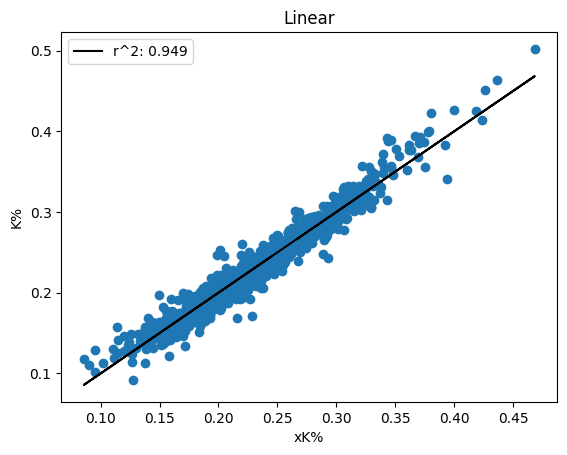

In [188]:
plot_pred_v_y(lr_preds, y, 'Linear')

In [189]:
X.shape

(988, 67)

In [190]:
X_val.shape

(335, 67)

In [191]:
lr.predict(X).shape

(988,)

In [192]:
lr.predict(X_val).shape

(335,)

In [193]:
y_val.shape

(335,)

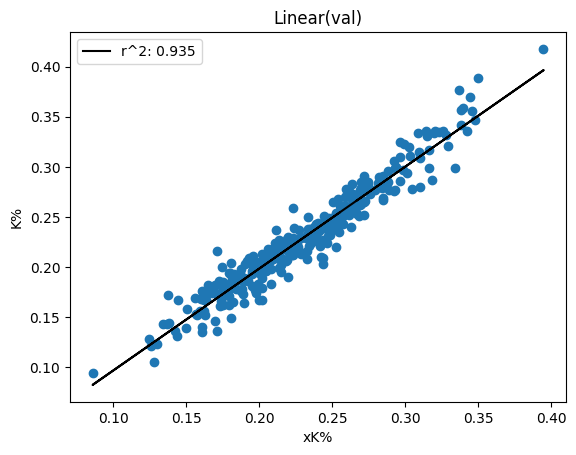

In [194]:
plot_pred_v_y(lr.predict(X_val), y_val, 'Linear(val)')

In [195]:
from sklearn.ensemble import RandomForestRegressor

In [196]:
rf = RandomForestRegressor()

In [197]:
rf_preds = train(rf, X, y, X_val, y_val)

train score: 0.9871664784309583
val score: 0.9009889366525192


In [198]:
sort_imps(cols, rf.feature_importances_)

[('I/Str', 0.8283229975588651),
 ('Con', 0.0334977264706565),
 ('S/Str', 0.025284577270393176),
 ('Pit/PA', 0.021525789552296885),
 ('Str%', 0.010416219163603808),
 ('S/SO', 0.009713169556410035),
 ('30%', 0.007781499396191451),
 ('F/Str', 0.006384365297547446),
 ('1st%', 0.005289878737378019),
 ('L/SO', 0.004634488849542989),
 ('3pK', 0.004076667916876845),
 ('02%', 0.003366064541157458),
 ('Rk', 0.003359017210565259),
 ('L/SO%', 0.003133400282847165),
 ('MLBAMID', 0.002865594957115489),
 ('PlayerId', 0.002849927426807754),
 ('AS/Pit', 0.002398808312840977),
 ('TBF', 0.0019796369545976053),
 ('30c', 0.0019479006508521812),
 ('IP', 0.00176893374463143),
 ('Age', 0.0017193021573311106),
 ('02h', 0.0016525889948888085),
 ('AS/Str', 0.001641182288684732),
 ('02s', 0.001633388369076394),
 ('L/Str', 0.0016124691314499267),
 ('30s', 0.0015826418833100669),
 ('4pW', 0.0014856515169078058),
 ('02c', 0.0011429498002467583),
 ('Season', 0.0008938002595265193),
 ('Pit', 0.0008916794024662269),
 (

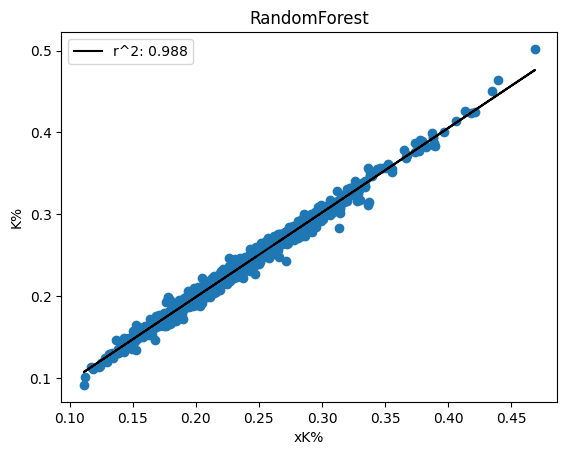

In [199]:
plot_pred_v_y(rf_preds, y, 'RandomForest')

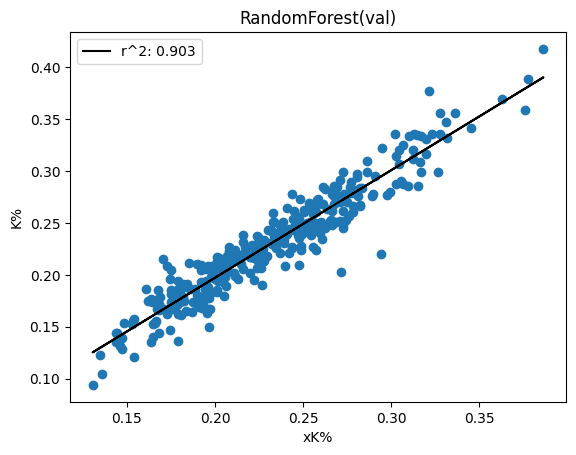

In [200]:
plot_pred_v_y(rf.predict(X_val), y_val, 'RandomForest(val)')

In [4]:
def plot_player(player_id, train, test, source="mlb", default_year=2024, default_k=0.3):
    """
    defaults used to show blanks only.
    """
    source_col = lookup._check_source(source)
    train_mask = train[source_col] == player_id
    test_mask = test[source_col] == player_id

    name = train.loc[train_mask, "Name"].unique().item()
    seasons = train.loc[train_mask, "Season"].tolist()
    ks = train.loc[train_mask, "K%"].tolist()

    target_year = (
        test.loc[test_mask, "Season"].item() if test_mask.sum() else default_year
    )
    target = test.loc[test_mask, "K%"].item() if test_mask.sum() else default_k
    alpha = None if test_mask.sum() else 0
    title = f"{name} ({source}: {player_id})"
    if not test_mask.sum():
        title = f"{title}\n NO TARGET DATA FOR {target_year}"

    fig, ax = plt.subplots()
    ax.plot(
        pd.to_datetime(seasons, format="%Y"),
        ks,
        marker="s",
        label="Prev Year(s) K%",
    )
    ax.scatter(
        pd.to_datetime(target_year, format="%Y"),
        target,
        marker="o",
        color="g",
        s=50,
        label=f"{target_year} K% (target)",
        alpha=alpha,
    )
    ax.set_ylim([0, 0.51])
    ax.legend()
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    ax.set_xlabel("Year")
    ax.set_ylabel("K%")
    ax.set_title(title)
    plt.show();

In [ ]:
# TODO
- plotly graphs
- other models?
- functions and write ups!